Working of a random forest regression model
1. Pick at random K data points from the training set
2. Build decision tree associated to these K data points
3. Choose the number of trees (Ntrees) you want to build and repeat step 1 and 2
4. For a new data point, make each of your trees predict the value of y for the data point in question, and assign the new data point the average across all of the predicted y values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = dataset.iloc[:,1].values #level 
y = dataset.iloc[:,2].values #salary

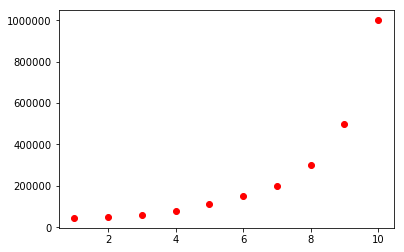

In [5]:
plt.scatter(x,y, color = 'red')

In [6]:
# from sklearn.cross_validation import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) #choose 20, 25 or 30% of data for test data

In [8]:
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)

In [21]:
#Fitting Decision Tree Regressor to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300,random_state = 0)
regressor.fit(x,y)

/Users/shabeena/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

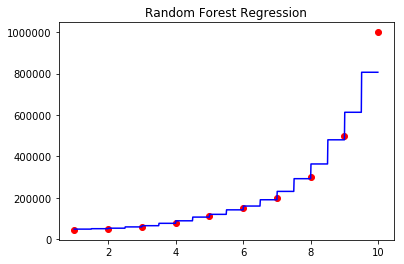

In [22]:
#Creating smoother curve for Decision Tree Regression  
x_grid = np.arange(min(x),max(x),0.01) #creating x variables in increment of 0.01 (instead of 1 previously)
x_grid = x_grid.reshape(len(x_grid),1) #need to reshape as predict model expects a matrix
plt.scatter(x,y,color = 'red') #plot original data points in the scatter plot
plt.plot(x_grid,regressor.predict(x_grid),color = 'blue') 
plt.title('Random Forest Regression')
plt.show()

In [26]:
regressor.predict(6.5) 

array([ 160333.33333333])